 DigHum 101 <br>
Akshatha Muralidhar <br>
July 2020

##  ML techniques for classifying Phishing websites

#### What is Phishing?

Phishing attacks are one of the most common forms of cybersecurity threats in today's world! It is a cyber attack where a bad actor tries to obtain sensitive information about an individual such as social security numbers, usernames, passwords, financial information etc. by posing as a credible or trusthworthy party. These kinds of attacks usually come in the form of emails or spurious websites.

#### Why should we care?

The COVID-19 era has brought us a long list of challenges, including an exploding number of phishing attacks! According to Proofpoint, an enterprise security company in the Silicon Valley, there has been a surge in the creation of COVID-19 themed credential phishing websites that have been mimicking many governmental and non-governmental organizations, the WHO, the IRS and even the CDC! Furthermore, according to the helpNetSecurity, which is an online information security magazine written by security professionals in the industry,  "Hackers spun up 60,707 banking websites to attempt to siphon off stimulus funds" ( "COVID-19 has contributed to record breaking cybercriminal activity", 2020).



In unprecedented times like these, when people turn to the cyberspace to perform more e-activities than usual, it is important for cybersecuity professionals to prioritize their online security. By doing so, they'll be protecting the privacy, identity and in many cases, even the dignity of society as a whole.

###  Methods and Resources

`Reading`: I read some papers on how people in academia were using a machine learning approach to tackle this problem. <br>


`Data Collection`: I acquired the data from UCI's Machine Learning Repository. The dataset has 2456 instances and 30 features that are important in terms of predicting phishing attacks. The data is from 2015, however it is still beneficial to help us idenity new phishing websites, based on patterns from the past.



`Features`: <br>
- having_IP_Address 
- URL_Length
- Shortining_Service 
- having_At_Symbol
- double_slash_redirecting 
- Prefix_Suffix
- having_Sub_Domain
- SSLfinal_State
- Domain_registeration_length
- Favicon
- port
- HTTPS_token
- Request_URL
- URL_of_Anchor
- Links_in_tags
- SFH
- Submitting_to_email
- Abnormal_URL
- Redirect
- on_mouseover
- RightClick
- popUpWidnow
- Iframe
- age_of_domain
- DNSRecord
- web_traffic
- Page_Rank
- Google_Index
- Links_pointing_to_page
- Statistical_report
- Result



###  Research Question

**Would a superlearner Ensemble model better predict phising websites, rather than individual models?**

In [473]:

from heatmap import heatmap, corrplot
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True, font_scale=1.2)
import scipy
from scipy import stats
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
#%load_ext autoreload
#%autoreload 2

In [474]:
phishing = pd.read_csv('/Users/Akshatha/Desktop/phish_data.csv')
phishing.drop(phishing.columns[[0]], axis = 1, inplace = True)
phishing.head(20)

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,1,0,0,1,-1,-1,-1,0,0,...,0,0,-1,1,-1,-1,0,1,1,1
1,0,1,0,0,0,-1,0,1,0,0,...,0,0,-1,1,0,-1,0,1,0,1
2,0,0,0,0,0,-1,-1,-1,0,0,...,0,0,0,1,1,-1,0,0,1,1
3,0,0,0,0,0,-1,-1,-1,1,0,...,0,0,-1,1,1,-1,0,-1,0,1
4,0,0,1,0,0,-1,1,1,0,0,...,1,0,-1,1,0,-1,0,1,0,-1
5,1,0,1,0,1,0,1,1,0,0,...,0,0,0,0,1,0,0,-1,1,-1
6,0,-1,0,0,0,-1,-1,1,-1,1,...,1,1,1,1,1,1,0,0,1,-1
7,0,-1,0,0,0,1,1,1,-1,0,...,0,0,1,0,-1,-1,0,-1,1,-1
8,0,0,0,0,0,0,-1,1,-1,0,...,0,0,1,0,1,0,0,0,1,-1
9,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,1,-1,0,1,1,1


In [496]:
phishing['Abnormal_URL'].head(8)

0    1
1    0
2    1
3    0
4    0
5    1
6    1
7    1
Name: Abnormal_URL, dtype: int64

In [475]:
for col in phishing.columns: 
    print(col) 

having_IP_Address
URL_Length
Shortining_Service
having_At_Symbol
double_slash_redirecting
Prefix_Suffix
having_Sub_Domain
SSLfinal_State
Domain_registeration_length
Favicon
port
HTTPS_token
Request_URL
URL_of_Anchor
Links_in_tags
SFH
Submitting_to_email
Abnormal_URL
Redirect
on_mouseover
RightClick
popUpWidnow
Iframe
age_of_domain
DNSRecord
web_traffic
Page_Rank
Google_Index
Links_pointing_to_page
Statistical_report
Result


In [476]:
#plt.figure(figsize=(15, 15))
#corrplot(phishing.corr(), size_scale=300);

In [497]:
#np.random.seed(42)
#from sklearn.model_selection import StratifiedShuffleSplit
X = phishing.drop("Result", axis = 1)
y = phishing["Result"]

In [499]:
# Split Data using the stratify parameter
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.25)



#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [488]:

#Logistic Regression

from sklearn.model_selection import cross_val_score
from sklearn import metrics

logreg = LogisticRegression(solver = "liblinear")
logreg.fit(X_train, y_train)
logreg_scores = cross_val_score( logreg, X,np.ravel(y), cv=10, scoring='roc_auc')
p_log = logreg.predict_proba(X_test)[:, 1]
print("Logistic Regression ROC-AUC score: %.3f" % roc_auc_score(y_test, p_log,))
print("Cross Validated Results :",logreg_scores)

Logistic Regression ROC-AUC score: 0.988
Cross Validated Results : [0.97911096 0.99067513 0.98673128 0.99358289 0.97910668 0.99062479
 0.98718295 0.98640718 0.98853211 0.98988127]


In [489]:
#Decision Tree

t1 = DecisionTreeClassifier(max_depth=3)
t1.fit(X_train, y_train)
p_dec = t1.predict_proba(X_test)[:, 1]
scores_t1 = cross_val_score(t1, X,np.ravel(y), cv=10, scoring='roc_auc')

print("Decision tree ROC-AUC score: %.3f" % roc_auc_score(y_test, p_dec))
print("Cross Validated Results :", scores_t1)

Decision tree ROC-AUC score: 0.975
Cross Validated Results : [0.94685829 0.98001337 0.97342914 0.98479278 0.96628273 0.98319159
 0.97173502 0.98259579 0.97733405 0.97905424]


In [490]:
#Random Forest Classifier

rf = RandomForestClassifier(
    n_estimators=10,
    max_features=3)

rf.fit(X_train, y_train)
p_forest = rf.predict_proba(X_test)[:, 1]
scores_rf = cross_val_score(rf, X,np.ravel(y), cv=10, scoring='roc_auc')
print("Average of decision tree ROC-AUC score: %.3f" % roc_auc_score(y_test, p_forest))
print("Cross Validated Results :", scores_rf)

Average of decision tree ROC-AUC score: 0.993
Cross Validated Results : [0.99655749 0.99679144 0.99796123 0.99395053 0.99685261 0.99879462
 0.99436724 0.99743659 0.99865084 0.99325418]


In [491]:
# A host of Scikit-learn models
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier



def get_models():
    """Generate a library of base learners."""
    dt = DecisionTreeClassifier(max_depth=3)
    nb = GaussianNB()
    svc = SVC(C=100, probability=True)
    knn = KNeighborsClassifier(n_neighbors=3)
    lr = LogisticRegression(solver = "liblinear")
    nn = MLPClassifier((80, 10), early_stopping=False)
    gb = GradientBoostingClassifier(n_estimators=100)
    rf = RandomForestClassifier(n_estimators=10, max_features=3)

    models = {'dt': dt,
              'svm': svc,
              'knn': knn,
              'naive bayes': nb,
              'mlp-nn': nn,
              'random forest': rf,
              'gbm': gb,
              'logistic': lr,
              }

    return models


def train_predict(model_list):
    """Fit models in list on training set and return preds"""
    P = np.zeros((y_test.shape[0], len(model_list)))
    P = pd.DataFrame(P)

    print("Fitting models.")
    cols = list()
    for i, (name, m) in enumerate(models.items()):
        print("%s..." % name, end=" ", flush=False)
        m.fit(X_train, y_train)
        P.iloc[:, i] = m.predict_proba(X_test)[:, 1]
        cols.append(name)
        print("done")

    P.columns = cols
    print("Done.\n")
    return P


def score_models(P, y):
    """Score model in prediction DF"""
    print("Scoring models.")
    for m in P.columns:
        score = roc_auc_score(y, P.loc[:, m])
        print("%-26s: %.3f" % (m, score))
    print("Done.\n")

In [492]:
models = get_models()
p_ensemble = train_predict(models)
score_models(p_ensemble , y_test)

Fitting models.
dt... done
svm... done
knn... done
naive bayes... done
mlp-nn... 

/Users/Akshatha/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done
random forest... done
gbm... done
logistic... done
Done.

Scoring models.
dt                        : 0.975
svm                       : 0.993
knn                       : 0.983
naive bayes               : 0.981
mlp-nn                    : 0.995
random forest             : 0.990
gbm                       : 0.994
logistic                  : 0.988
Done.



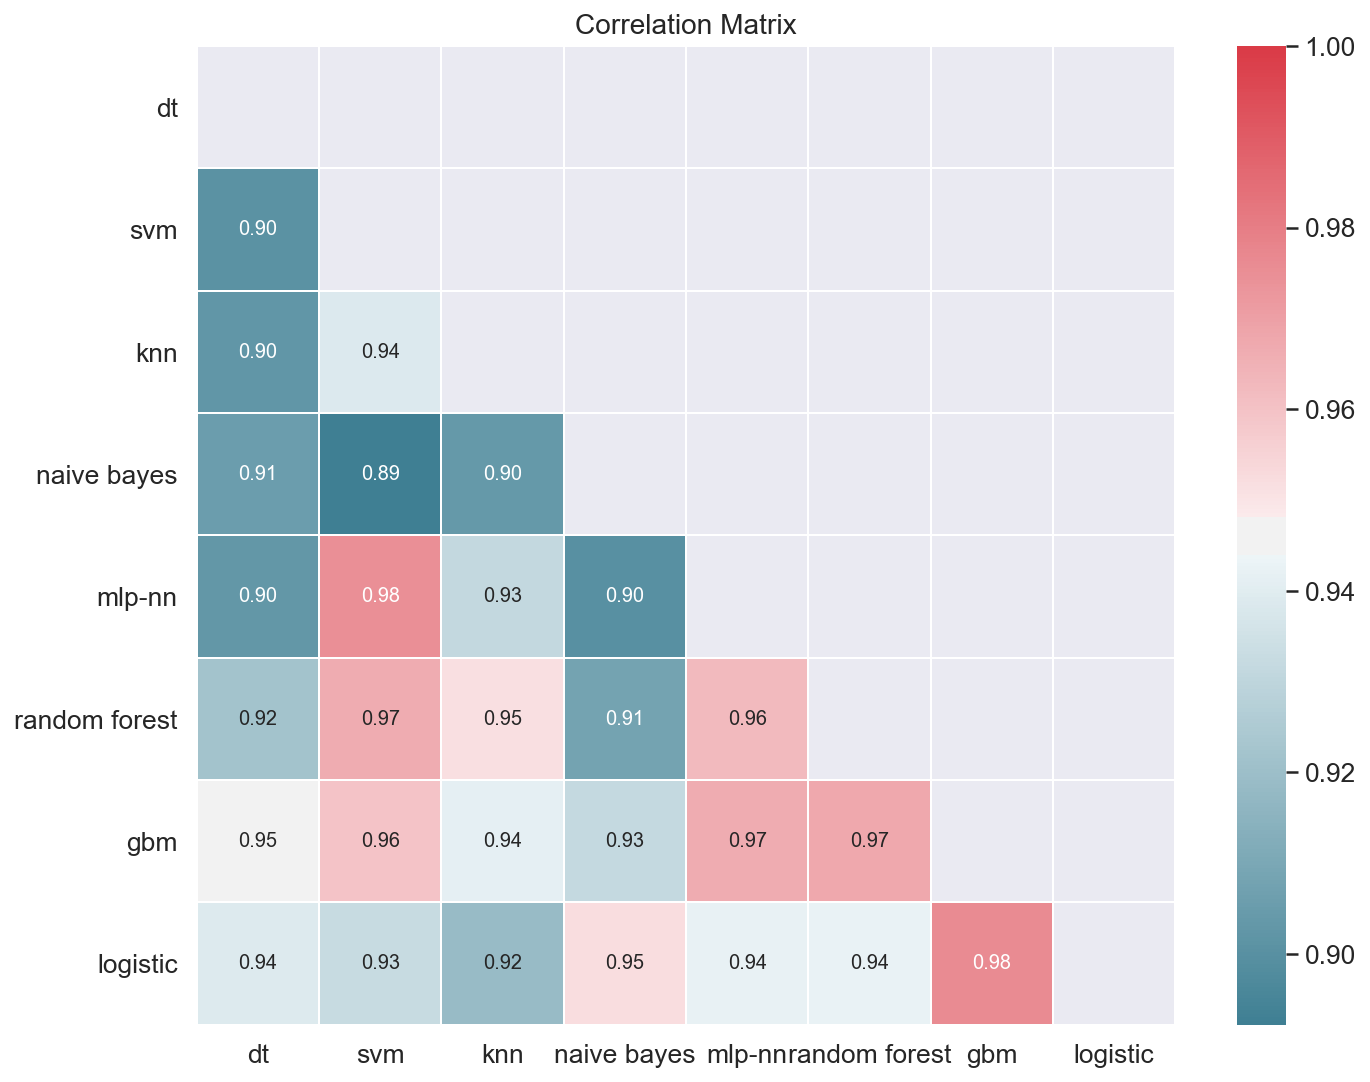

In [493]:
!pip install mlens
from mlens.visualization import corrmat

corrmat(p_ensemble.corr(), inflate=False)
plt.show()

In [498]:
print("Ensemble ROC-AUC score (Without) Stacking: %.3f" % roc_auc_score(y_test, p_ensemble.mean(axis=1)))


Ensemble ROC-AUC score (Without) Stacking: 0.996


In [429]:
from sklearn.base import clone

def stacking(base_learners, meta_learner, X, y, generator):
    """Simple training routine for stacking."""

    # Train final base learners for test time
    print("Fitting final base learners...", end="")
    train_base_learners(base_learners, X, y, verbose=False)
    print("done")

    # Generate predictions for training meta learners
    # Outer loop:
    print("Generating cross-validated predictions...")
    cv_preds, cv_y = [], []
    for i, (train_idx, test_idx) in enumerate(generator.split(X)):

        fold_xtrain, fold_ytrain = X[train_idx, :], y[train_idx]
        fold_xtest, fold_ytest = X[test_idx, :], y[test_idx]

        # Inner loop: step 4 and 5
        fold_base_learners = {name: clone(model)
                              for name, model in base_learners.items()}
        train_base_learners(
            fold_base_learners, fold_xtrain, fold_ytrain, verbose=False)

        fold_P_base = predict_base_learners(
            fold_base_learners, fold_xtest, verbose=False)

        cv_preds.append(fold_P_base)
        cv_y.append(fold_ytest)
        print("Fold %i done" % (i + 1))

    print("CV-predictions done")

    # Be careful to get rows in the right order
    cv_preds = np.vstack(cv_preds)
    cv_y = np.hstack(cv_y)

    # Train meta learner
    print("Fitting meta learner...", end="")
    meta_learner.fit(cv_preds, cv_y)
    print("done")

    return base_learners, meta_learner

In [472]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedShuffleSplit

# Train with stacking
cv_base_learners, cv_meta_learner = stacking(
    get_models(), clone(meta_learner), X_train.values, y_train.values, KFold(5))

P_pred, p_cv = ensemble_predict(cv_base_learners, cv_meta_learner, X_test, verbose=False)
print("\nEnsemble ROC-AUC score with Stacking: %.3f" % roc_auc_score(y_test, p_cv))

Fitting final base learners...

/Users/Akshatha/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done
Generating cross-validated predictions...


/Users/Akshatha/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Fold 1 done


/Users/Akshatha/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Fold 2 done


/Users/Akshatha/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Fold 3 done


/Users/Akshatha/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Fold 4 done


/Users/Akshatha/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Fold 5 done
CV-predictions done
Fitting meta learner...done

Ensemble ROC-AUC score with Stacking: 0.999


#### Results

**Ensemble models**
- ROC_AUC score for the superlearning ensemble model with  stacking yields me a result of 0.999 
- ROC_AUC score for the superlearning ensemble model without stacking seems to yield me a result of 0.996. 

**Individual models**
-  ROC_AUC score for the logistic regression model seems to yield me a result of 0.988.
-  ROC_AUC score for a decision tree model seems to yield me a result of 0.975.
-  ROC_AUC score for a random forest model seems to yield me a result of 0.993.


<br>

Would be cautious to say that superlearning ensemble models work better than individual models. More investigation required.

#### What would I do differently next time?

- Use the PR AUC score metric to evaluate since there is a high potential that this dataset might be imbalanced.
- Take features into account next time, find highly correlated features and then work with them.

### Conclusion ###

The whole point of this project was to find a more efficient machine learning model to predict phising websites. However, in the bigger picture, it is an effort to find a faster and convenient to prevent phising beacause in cyber security time is definitely of essence. <br>

Moreover, COVID-19 has already caused a lot of mistrust and confusion in the world. Due to social distancing many people have resorted to connecting to the world through the internet. And it is highly crucial, especially at this time to help preserve the integrity and security of the one platform they do trust!

### Citations ###

Akinyelu, A. A., &amp; Adewumi, A. O. (2014). Classification of Phishing Email Using Random Forest Machine Learning Technique. Journal of Applied Mathematics, 2014, 1-6. doi:10.1155/2014/425731 <br>

Help Net Security May 14, Help Net Security, &amp; 14, M. (2020, May 12). COVID-19 has contributed to record breaking cybercriminal activity. Retrieved July 06, 2020, from https://www.helpnetsecurity.com/2020/05/14/covid-19-cybercriminal-activity/ <br>

M, M., &amp; Godara, S. (2019). Analysis of various Machine Learning Techniques to Detect Phishing Email. International Journal of Computer Applications, 178(38), 4-12. doi:10.5120/ijca2019919251 <br>

14, M., &amp; Team, P. (2020, May 15). Ready-made COVID-19 Themed Phishing Templates Copy Government Websites Worldwide: Proofpoint US. Retrieved July 06, 2020, from https://www.proofpoint.com/us/blog/threat-insight/ready-made-covid-19-themed-phishing-templates-copy-government-websites-worldwide <br>

Miyamoto, D., Hazeyama, H., &amp; Kadobayashi, Y. (2009). An Evaluation of Machine Learning-Based Methods for Detection of Phishing Sites. Advances in Neuro-Information Processing Lecture Notes in Computer Science, 539-546. doi:10.1007/978-3-642-02490-0_66 <br>

Sanglerdsinlapachai, N., &amp; Rungsawang, A. (2010). Using Domain Top-page Similarity Feature in Machine Learning-Based Web Phishing Detection. 2010 Third International Conference on Knowledge Discovery and Data Mining. doi:10.1109/wkdd.2010.108 <br>




